In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (confusion_matrix, plot_confusion_matrix,classification_report,
                             accuracy_score, precision_score, recall_score, f1_score, log_loss,
                             roc_auc_score, precision_recall_curve)

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('../../DataScience/data/winequality-red.csv.gz')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1],
                                                    df.iloc[:,-1],
                                                    random_state=3003,
                                                    test_size=.25,
                                                    stratify=df.iloc[:,-1])

In [5]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1199, 11), (400, 11), (1199,), (400,))

## Random Forest Classifier

In [6]:
forest = RandomForestClassifier(random_state=10)

forest.fit(x_train, y_train)

RandomForestClassifier(random_state=10)

In [7]:
forest.feature_importances_

array([0.07797648, 0.10224944, 0.07332744, 0.07066614, 0.08216546,
       0.06700029, 0.10204979, 0.09701203, 0.07728033, 0.1073102 ,
       0.14296241])

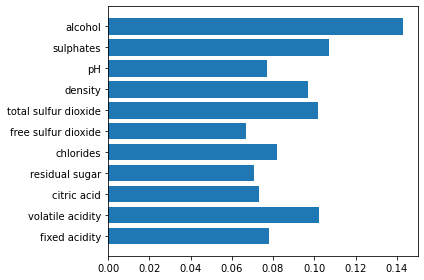

In [8]:
fig, ax = plt.subplots()

ax.barh(width=forest.feature_importances_, y=x_train.columns)
fig.tight_layout()

In [9]:
y_train_pred = forest.predict(x_train)
y_test_pred = forest.predict(x_test)

In [10]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00       511
           6       1.00      1.00      1.00       478
           7       1.00      1.00      1.00       149
           8       1.00      1.00      1.00        13

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199



In [11]:
print(classification_report(y_test, y_test_pred, zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.74      0.86      0.80       170
           6       0.72      0.71      0.72       160
           7       0.73      0.60      0.66        50
           8       1.00      0.20      0.33         5

    accuracy                           0.73       400
   macro avg       0.53      0.40      0.42       400
weighted avg       0.71      0.73      0.71       400



In [12]:
y_pred = forest.predict(x_train)

In [15]:
rfc = RandomForestClassifier()

In [16]:
rfc_param = {
    'n_estimators': [100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None], #
    'min_samples_split': [3,5,8],
    'min_samples_leaf': [3,6],
    'min_weight_fraction_leaf': [0.0],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None],
    'min_impurity_decrease': [0.0],
    'min_impurity_split': [None],
    'bootstrap': [True],
    'oob_score': [True],
    'n_jobs': [3],
    'random_state': [2021],
    'verbose': [0],
    'warm_start': [False],
    'class_weight': ['balanced'],
    'ccp_alpha': [0.0],
    'max_samples': [None]
}

In [17]:
tree_grid = GridSearchCV(estimator=rfc, param_grid=rfc_param)

In [18]:
tree_grid.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'ccp_alpha': [0.0],
                         'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'], 'max_depth': [None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [None], 'max_samples': [None],
                         'min_impurity_decrease': [0.0],
                         'min_impurity_split': [None],
                         'min_samples_leaf': [3, 6],
                         'min_samples_split': [3, 5, 8],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100], 'n_jobs': [3],
                         'oob_score': [True], 'random_state': [2021],
                         'verbose': [0], 'warm_start': [False]})

In [19]:
tree_y_pred = tree_grid.predict(x_train)

In [20]:
tree_grid.best_score_

0.6597245467224547

In [21]:
print(classification_report(y_train, tree_y_pred))

              precision    recall  f1-score   support

           3       0.73      1.00      0.84         8
           4       0.95      1.00      0.98        40
           5       0.97      0.96      0.96       511
           6       0.97      0.96      0.97       478
           7       0.94      0.99      0.96       149
           8       1.00      1.00      1.00        13

    accuracy                           0.97      1199
   macro avg       0.93      0.98      0.95      1199
weighted avg       0.97      0.97      0.97      1199



In [26]:
cls_rf = RandomForestClassifier(class_weight='balanced', random_state=264)

In [30]:
model2 = cls_rf.fit(x_train, np.ravel(np.array(y_train)))

In [31]:
model2_y_train_pred = cls_rf.predict(x_train)

In [ ]:
[(est.get_depth(), est.tree_.max_depth, est.max_depth) for est in cls_rf.estimators_]

In [62]:
def rd_estimator_(cls):
    max_depth = np.array([est.get_depth() for est in cls.estimators_])
    print(f"Classifier Parameters\n")
    print(f"{'max_depth':15} {'Min Value':10}{np.min(max_depth)} {'Max Value':10} {np.max(max_depth)}")
    print(f"{'N. Leaves':15} {cls.estimators_[0].tree_.n_leaves}")
    print(f"{'Max n Classes':15} {cls_rf.estimators_[0].tree_.max_n_classes}")
    print(f"{'CCP Alpha':15} {cls.estimators_[0].ccp_alpha}")
    